In [1]:
import numpy as np
import components.utils.utils as u
import components.utils.tf_utils as tfu

from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Step 1: loading the pre-trained model
Explain what you do here

In [2]:
model = VGG16()
model.summary()

553467904/553467096 [==============================] - 56s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

Step 2 - Extracting the first convolutional layers
Explain what you do here

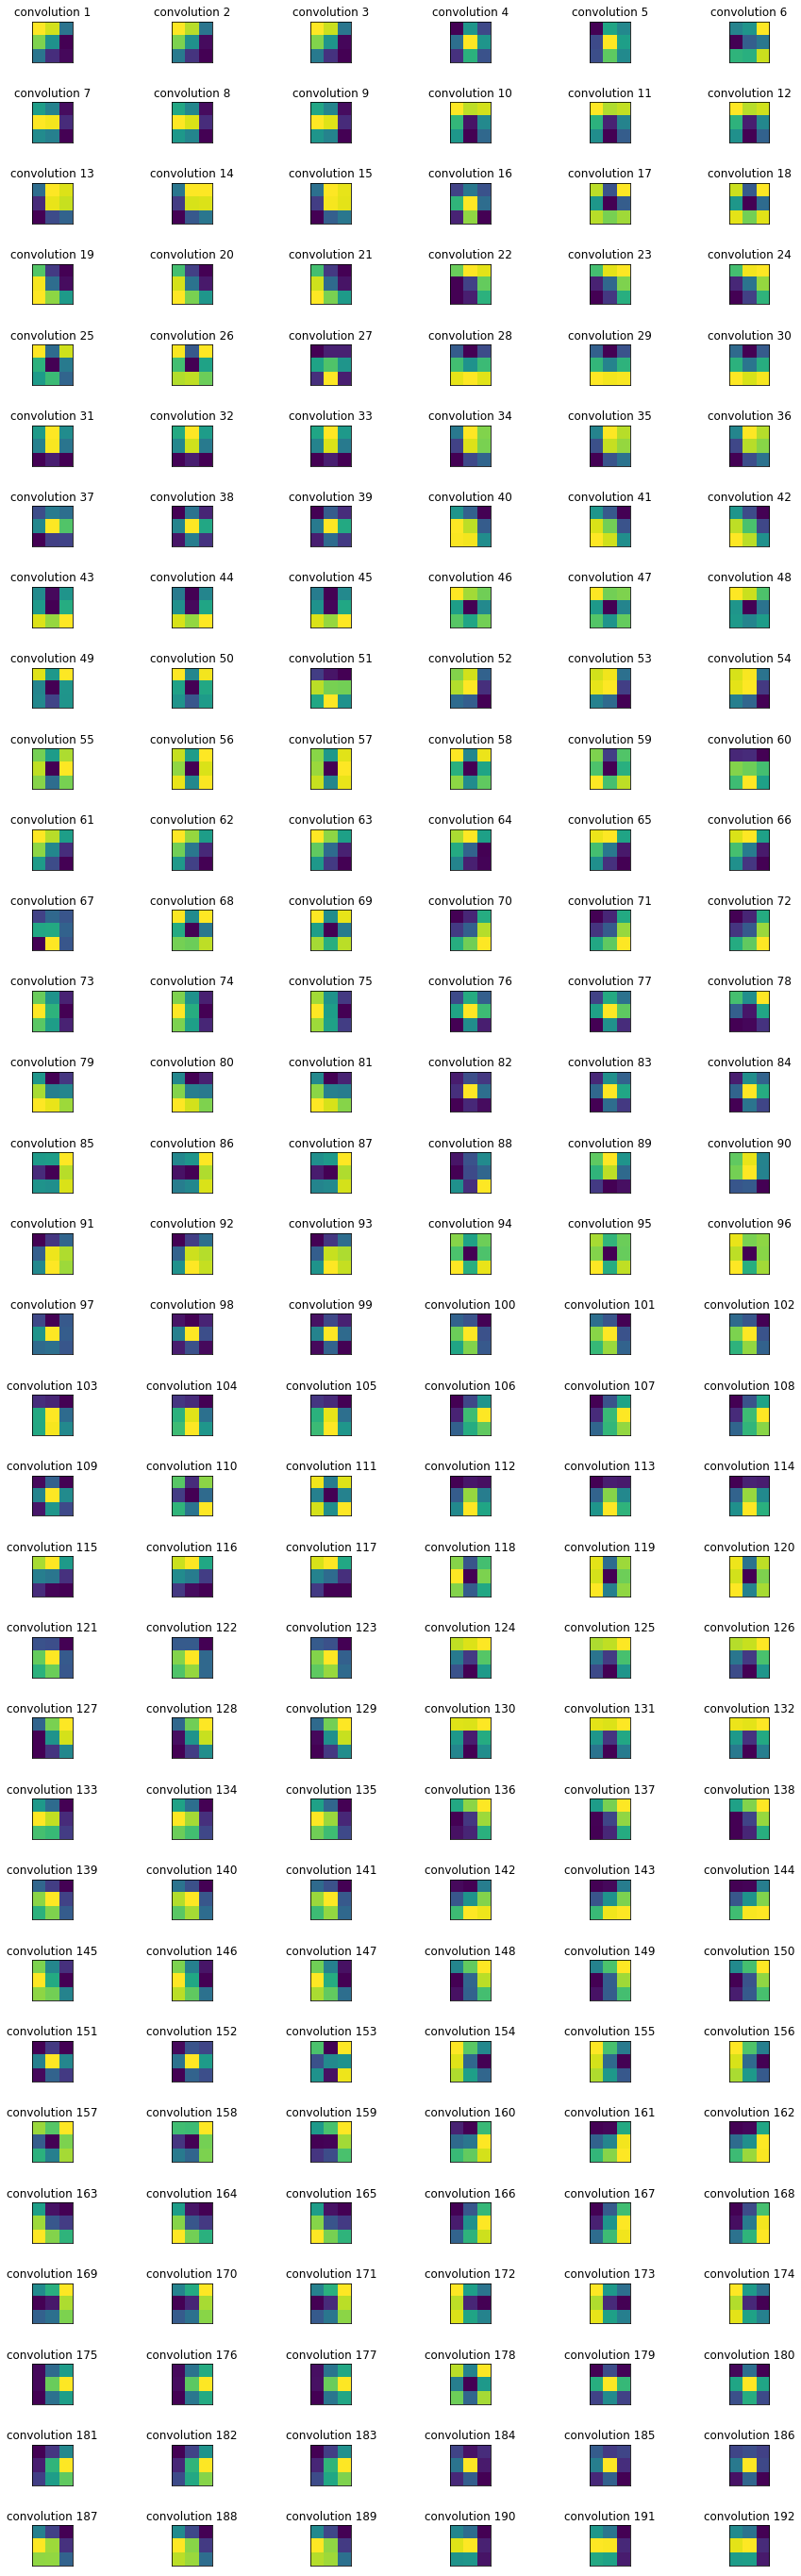

In [3]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_name = 'block1_conv1'
layer = layer_dict[layer_name]
tfu.print_conv_layer_filters(layer)

Step 3 : building a simple model using the extracted feature maps on an input image

(375, 450, 3)


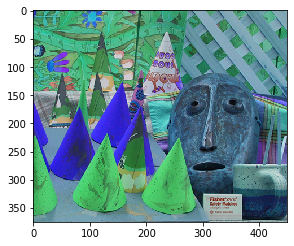

In [5]:
import cv2
im2 = cv2.imread("./datasets/middlebury_2003/cones/im2.ppm")
plt.figure(figsize = [10,10])
plt.subplot(121)
plt.imshow(im2)
print(im2.shape)

In [6]:
model = tfu.get_model(im2, layer_dict[layer_name])
im2 = im2.reshape(1, im2.shape[0], im2.shape[1], im2.shape[2])
processed = model.predict(im2)
print(processed.shape)

(1, 375, 450, 64)


In [7]:
processed_squeezed = np.squeeze(processed)
print(processed_squeezed.shape)
processed_reshaped = np.moveaxis(processed_squeezed, 2,0)

(375, 450, 64)


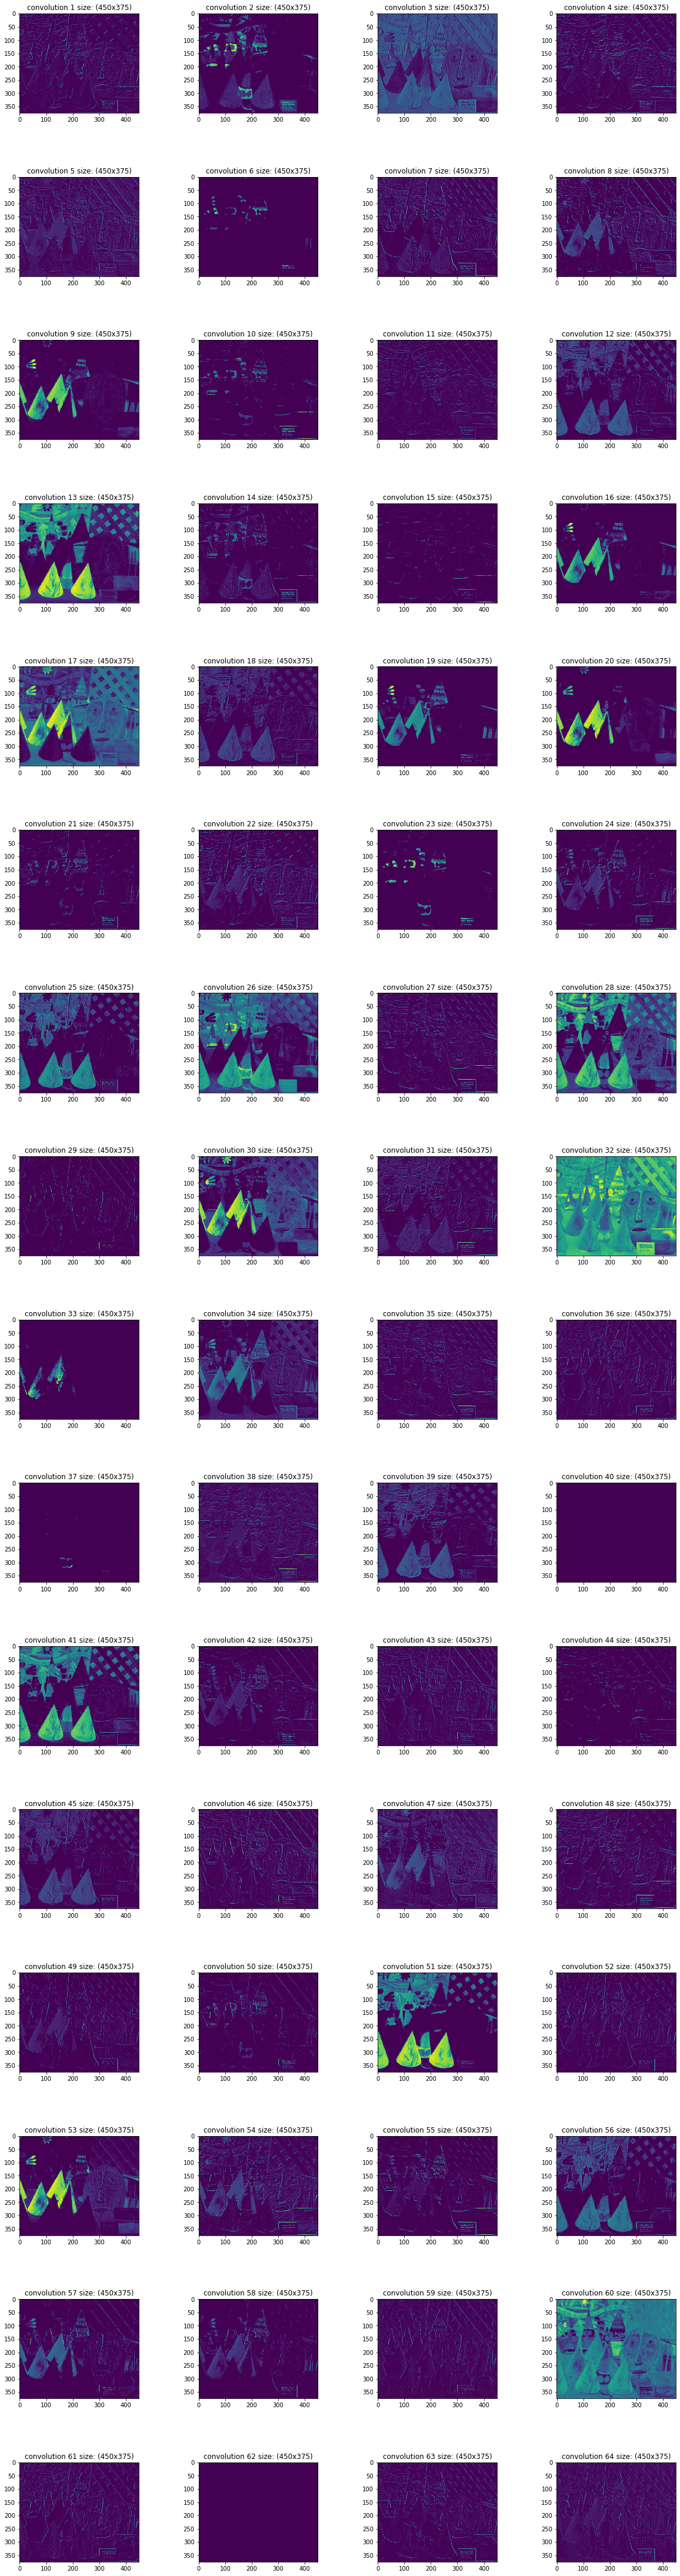

In [8]:
u.plotNImages2(processed_reshaped, cMode = "viridis")